#### Import Required Libraries

In [6]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Loading Data

In [10]:
df = pd.read_excel('data_combined.xlsx')

#### Preprocess Data

In [36]:
df.columns

Index(['Cereal_yield', 'Mean_area_protected_terrestrial ',
       'Wastewater_Treatment ', 'Electronic_waste ',
       'CO2_emissions_combustion', 'Nitrogen_emissions ',
       'CO2_emissions_exports', 'Sustainable Nitrogen Management Index ',
       'Poverty at $1.90/day', 'Subjective_well_being', 'Unemployment ',
       'Employment_to_population', 'Gini ', 'Internet_users',
       'Mobile_subscriptions ', 'Net_primary_enrollment ',
       'Lower_secondary_completion ', 'Female_to_male_labor ',
       'Safely_managed_water ', 'Access_improved_water ', 'Property_Rights ',
       'Feel_safe_walking_at_night', 'Victims_of_modern_slavery ',
       'Undernourishment ', 'Stunting <5Y', 'Wasting <5Y', 'Obesity ',
       'Human_Trophic_Level ', 'Tuberculosis ', 'HIV ', 'Disease_Deaths',
       'Pollution_Deaths  ', 'Adolescent_fertility ', 'Maternal_mortality ',
       'Neonatal_mortality ', 'Mortality <5Y', 'Traffic_deaths ',
       'Life_expectancy ', 'Infants_with_WHO_vaccine', 'Births_by_

In [12]:
# Dropping unnecessary columns
df.drop(['Country', 'Income Group', 'SDG Index ', 'Year'], axis = 1, inplace = True)

In [13]:
# Dropping missing values rows
df.dropna(inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cereal_yield                            290 non-null    float64
 1   Mean_area_protected_terrestrial         290 non-null    float64
 2   Wastewater_Treatment                    290 non-null    float64
 3   Electronic_waste                        290 non-null    float64
 4   CO2_emissions_combustion                290 non-null    float64
 5   Nitrogen_emissions                      290 non-null    float64
 6   CO2_emissions_exports                   290 non-null    float64
 7   Sustainable Nitrogen Management Index   290 non-null    float64
 8   Poverty at $1.90/day                    290 non-null    float64
 9   Subjective_well_being                   290 non-null    float64
 10  Unemployment                            290 non-null    float6

In [15]:
df.head()

,Cereal_yield,Mean_area_protected_terrestrial,Wastewater_Treatment,Electronic_waste,CO2_emissions_combustion,Nitrogen_emissions,CO2_emissions_exports,Sustainable Nitrogen Management Index,Poverty at $1.90/day,Subjective_well_being,...,Births_by_skilled,Homicides,Political_Stability,Corruption_Perception,Expenditure_R&D,Voice_and_Accountability,Regulatory_Quality,GOV_Effectiveness,Rule_of_Law,Prison_population
0,2.1372,53.228372,95.0,20.000,1.590571,86.465303,43996.430928,0.802205,0.288078,7.300000,...,99.3,1.000000,0.896061,79,2.19575,1.375636,1.933411,1.538219,1.686461,151.000000
1,2.0743,53.230000,95.0,20.000,1.592879,86.465303,43996.430928,0.802205,0.092039,7.300000,...,99.3,0.980000,0.989604,77,2.20207,1.380593,1.902706,1.595232,1.715382,150.750000
2,2.0743,54.264980,95.0,23.600,1.592158,86.465303,45239.046427,0.802205,0.520000,7.176994,...,99.7,0.941156,0.911746,77,1.92818,1.267441,1.873689,1.571555,1.734473,161.053779
3,2.6740,52.671000,92.7,23.600,1.573000,105.361000,45100.472000,0.631000,0.520000,7.234000,...,99.7,0.800000,0.848752,77,1.92300,1.304121,1.816904,1.619163,1.651188,168.508000
4,2.0350,55.680000,92.7,21.679,1.533000,105.361000,42218.073000,0.631000,0.200000,7.100000,...,99.7,0.892000,0.848752,77,1.87400,1.304121,1.816904,1.619163,1.651188,168.508000


#### Adequacy Test

Before performing factor analysis, it needs to evaluate the “factorability” of the dataset. Factorability means "can it be found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
- Bartlett's Test
- Kaiser-Mayer-Olkin Test

**Bartlett’s test** of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(21637.68421172159, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

**Kaiser-Meyer-Olkin (KMO) Test** measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [18]:
kmo_model

0.9025383383540637

The overall KMO for data is 0.9, which is excellent. This value indicates that it is possible to proceed with planned factor analysis.

#### Choosing the Number of Factors


For choosing the number of factors, it can used the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [22]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(df, 25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.37333251e+01, 4.13246642e+00, 3.68183181e+00, 1.99103951e+00,
       1.70879866e+00, 1.53790987e+00, 1.33234749e+00, 1.04346531e+00,
       9.24914581e-01, 8.74404407e-01, 7.56309844e-01, 6.84540707e-01,
       6.24998822e-01, 6.10709062e-01, 5.01270336e-01, 4.74927388e-01,
       4.28624266e-01, 3.88555157e-01, 3.40493093e-01, 3.36757279e-01,
       3.08017893e-01, 2.77306655e-01, 2.35483345e-01, 2.17939533e-01,
       1.98551700e-01, 1.81174686e-01, 1.64059222e-01, 1.47437013e-01,
       1.29189799e-01, 1.19948979e-01, 1.13124818e-01, 9.41189724e-02,
       8.58164925e-02, 7.67613109e-02, 7.62109349e-02, 6.93044872e-02,
       6.57159067e-02, 5.58320513e-02, 4.95642856e-02, 4.25412501e-02,
       3.98696212e-02, 3.48377053e-02, 3.14464149e-02, 2.51860063e-02,
       1.62475921e-02, 1.26237514e-02, 1.05669862e-02, 9.90303856e-03,
       3.53047364e-03])

Here, it can be seen only for 8-factors eigenvalues are greater than one. It means it is necessary to choose only 8 factors (or unobserved variables).

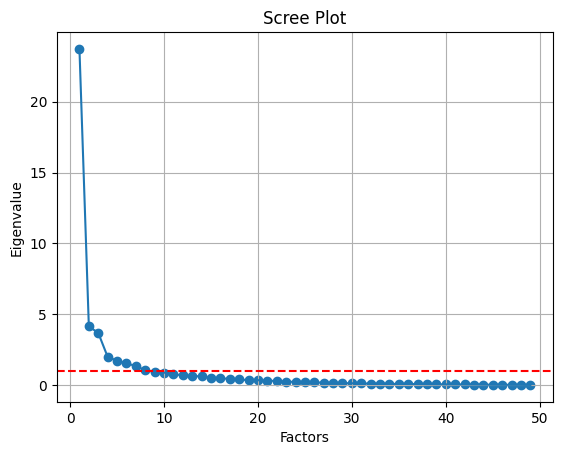

In [24]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors. Red line is delimites eigenvalue equal to 1.

Here, it can be seen only for 8-factors eigenvalues are greater than one. It means it is necessary to choose only 8 factors (or unobserved variables).

### Performing Factor Analysis


In [26]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 8, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [39]:
factors = fa.loadings_

factor1 = [values[0] for values in factors]
factor2 = [values[1] for values in factors]
factor3 = [values[2] for values in factors]
factor4 = [values[3] for values in factors]
factor5 = [values[4] for values in factors]
factor6 = [values[5] for values in factors]
factor7 = [values[6] for values in factors]
factor8 = [values[7] for values in factors]

results = {'Original column name': list(df.columns),
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5, 
          'Factor6': factor6, 
          'Factor7': factor7, 
          'Factor8': factor8, 
          }
results = pd.DataFrame(results, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'Factor8'])

In [40]:
results

,Original column name,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
0,Cereal_yield,0.325056,0.322984,-0.215440,-0.018305,-0.128509,0.213407,-0.040546,0.263590
1,Mean_area_protected_terrestrial,0.139619,0.005852,-0.163164,-0.096452,0.086685,0.713099,-0.072196,-0.030408
2,Wastewater_Treatment,0.701909,0.305449,-0.174511,-0.338025,-0.057180,0.194879,0.007731,0.052305
3,Electronic_waste,0.815202,0.302046,-0.239062,-0.249868,-0.070524,0.225813,-0.000460,0.062888
4,CO2_emissions_combustion,-0.409731,-0.237038,0.183178,0.126591,0.207586,0.141725,0.329891,-0.067217
5,Nitrogen_emissions,0.714667,0.232497,0.071747,-0.176614,-0.044970,0.086217,0.094848,-0.087527
6,CO2_emissions_exports,0.140623,0.004118,-0.078407,-0.179116,-0.100520,-0.188483,0.642805,-0.013490
7,Sustainable Nitrogen Management Index,-0.179412,-0.133111,0.088716,0.161252,0.101313,-0.490013,0.180965,-0.314002
8,Poverty at $1.90/day,-0.086043,-0.785896,0.295841,0.174859,0.357609,0.153011,0.098907,-0.169405
9,Subjective_well_being,0.802832,0.176738,-0.026119,-0.249746,-0.343041,0.157344,-0.008071,0.106273


- Factor 1 has high factor loadings for Environmental variables
- Factor 2 has high factor loadings for Social variables
- Factor 1 has high factor loadings for Governance variables
- Factor 4, 5, 6, 7, 8 have none of high loadings for any variable and is not easily interpretable. Its good to take only 3 factors.

Performing factor analysis for 3 factors.

In [41]:
# Create factor analysis object and perform factor analysis using 3 factors
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [43]:
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]
factor3_new = [values[2] for values in factors_new]

results_new = {'Original column name': list(df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new, 
          'Factor3': factor3_new, 
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3'])

In [44]:
results_new

,Original column name,Factor1,Factor2,Factor3
0,Cereal_yield,0.358092,0.290559,-0.289139
1,Mean_area_protected_terrestrial,0.331553,0.015573,-0.003678
2,Wastewater_Treatment,0.753552,0.390813,-0.160312
3,Electronic_waste,0.862610,0.353679,-0.242556
4,CO2_emissions_combustion,-0.334267,-0.267699,0.308734
5,Nitrogen_emissions,0.709163,0.297669,0.011559
6,CO2_emissions_exports,0.124804,0.060875,-0.081315
7,Sustainable Nitrogen Management Index,-0.307149,-0.162923,0.088067
8,Poverty at $1.90/day,-0.009610,-0.781984,0.533407
9,Subjective_well_being,0.800697,0.271910,-0.214885


In [46]:
# Get variance of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3'])

In [47]:
statistics

,,Factor1,Factor2,Factor3
0,SS Loadings,14.305546,11.085530,5.160248
1,Proportion Var,0.291950,0.226235,0.105311
2,Cumulative Var,0.291950,0.518185,0.623496


Total 62% cumulative Variance explained by the 3 factors

(I think it can be possible to use 2 factors, but i do not have domain knowledge)